Let $E(2)\cong \mathbb{R}^2\rtimes SO(2)$ denote the group of orientation-preserving isometries of the Euclidean plane where $\mathbb{R}^2$ acts by translation and $SO(2)\cong S^1$ acts by rotation. Then $E(2)$ acts on space of images (modeled as functions $\mathbb{R}^2\to [0,1]$) and the symmetry group of an image $I$ is defined to be the isotropy group $\Gamma = E(2)_I$ consisting of isometries $\sigma\in E(2)$ such that $\sigma\cdot I = I$. When $\Gamma$ is a **wallpaper group** (_i.e._ $\Gamma\cap \mathbb{R}^2$ is a lattice), the quotient $E(2)/\Gamma$ is a smooth compact 3-manifold diffeomorphic to the orbit space $E(2)\cdot I$.

Given an image $I$, our overarching goal is to model $E(2)/\Gamma$ by a point cloud in a high-dimensional Euclidean space (without _a priori_ knowledge of $\Gamma$), and then use the persistent homology of the point cloud to determine $\Gamma$. In order for this to be feasible, we must check that the homology of $E(2)/\Gamma$ distinguishes the different wallpaper groups $\Gamma$. In this notebook, we use the classification of (orientable) wallpaper groups and explicit cellular models of $E(2)/\Gamma$ to make the requisite computations.

## Wallpaper manifolds

Throughout, we follow [[Montesinos1987]](https://doi.org/10.1007/978-3-642-61572-6) for notation and results regarding wallpaper groups $\Gamma$ and their associated spaces $E(2)/\Gamma$. These groups are classified (up to isomorphism) by their **point groups**, _i.e._ the maximal subgroup of rotational symmetry about some point (not necessarily the origin). There are five cyclic subgroups that appear as point groups and thus five (oriented) wallpaper groups.

|    **Point Group**    |   **Wallpaper Group**   |
|:-------------------:|:----------------------:|
|         $C_1$          |           $S$             |
|         $C_2$          |         $S2222$        |
|         $C_3$          |          $S333$         |
|         $C_4$          |          $S432$         |
|         $C_6$          |          $S632$         |

We refer the reader to [[Montesinos1987, Chapter 2]](https://link.springer.com/chapter/10.1007/978-3-642-61572-6_2) for details on these groups and the quotient manifolds $E(2)/\Gamma$. Each such manifold is a [Seifert manifold](https://en.wikipedia.org/wiki/Seifert_fiber_space) fibrered over the circle by tori.

While the homology of Seifert manifolds is recorded in great generality in the literature, we find it more convenient to derive the homology of the wallpaper manifolds by hand. This will give us greater control over essential cycles and various geometric considerations later. Cellular homology is well-suited to this task as each $E(2)/\Gamma$ may be modeled as the [mapping torus](https://en.wikipedia.org/wiki/Mapping_torus) of a diffeomorphism $T^2\to T^2$. It will ultimately be the case that $H_1(~;\mathbb{F}_p)$ for $p=2,3$ will be sufficient for distinguishing the five wallpaper groups.

## $S$

This is the easiest case, requiring no special computations. We have $E(2)/S\cong T^3$, the three-dimensional torus, with well-known homology
$$
  H_k(E(2)/S;\mathbb{Z})\cong
  \begin{cases}
    \mathbb{Z} & k=0,3\\
    \mathbb{Z}^3 & k=1,2\\
    0 & \text{otherwise}.
  \end{cases}
$$

In particular, $H_1(E(2)/S;\mathbb{F}_p)\cong \mathbb{F}_p^3$ for all $p$.

## $S2222$

As a space (but not a group), $E(2)\cong \mathbb{R}^2\times \mathbb{R}/2\pi\mathbb{Z}$. In this case, a fundamental domain for $S2222$ acting on $E(2)$ may be taken as a parallelogram in $\mathbb{R}^2\times 0$ spanned by $(a,0)$ and $(b,0)$ times the interval $[0,\pi]$ in $\mathbb{R}/2\pi\mathbb{Z}$. Identifications are given by translation by $(a,0)$, translation by $(b,0)$, and translation by $(0,\pi)$ with a half-twist.

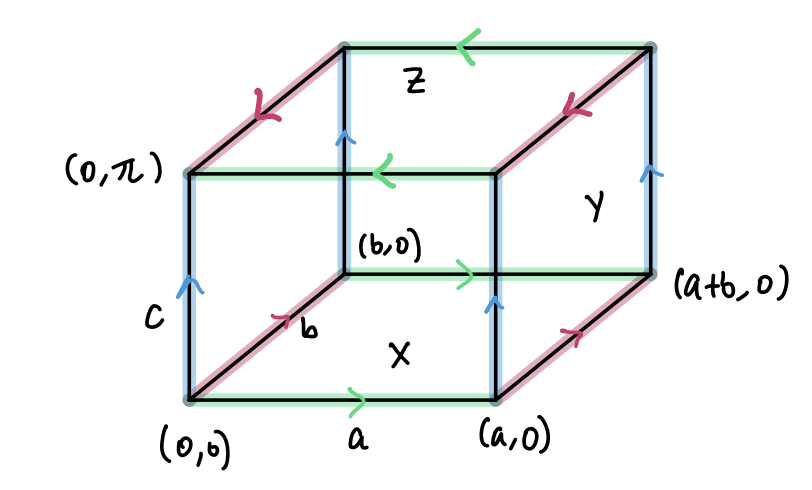

The following sage code implements the cellular chain complex for $E(2)/S2222$ and computes its homology:

In [5]:
C2222 = ChainComplex({
    1: matrix(ZZ,1,3,[0,0,0]),
    2: matrix(ZZ,3,3,[2,0,0,0,2,0,0,0,0]),
    3: matrix(ZZ,3,1,[0,0,0])},
    degree_of_differential=-1)
ascii_art(C2222)

                          [2 0 0]       [0]      
                          [0 2 0]       [0]      
            [0 0 0]       [0 0 0]       [0]      
 0 <-- C_0 <-------- C_1 <-------- C_2 <---- C_3 <-- 0 

In [3]:
C2222.homology()

{0: Z, 1: Z x C2 x C2, 2: Z, 3: Z}

In particular, we see that $H_1(E(2)/S2222;\mathbb{Z})\cong \mathbb{Z}\times (\mathbb{Z}/2\mathbb{Z})^2$. As such, $H_1(E(2)/S2222;\mathbb{F}_2)\cong \mathbb{F}_2^3$ while $H_1(E(2)/S2222;\mathbb{F}_p)\cong \mathbb{F}_p$ for $p>2$.

## $S432$

A fundamental domain for $S432$ acting on $E(2)$ is given by the square $[0,1]^2$ times the interval $[0,\pi/2]$. Identifications are given by translation by $(e_1,0)$, translation by $(e_2,0)$, and translation by $(0,\pi/2)$ with a quarter-twist.

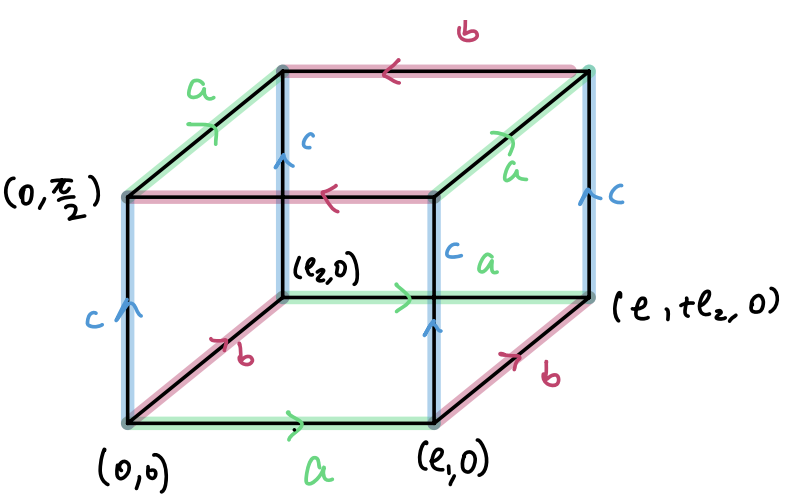

The following sage code implements the cellular chain complex for $E(2)/S432$ and computes its homology:

In [6]:
C432 = ChainComplex({
    1: matrix(ZZ,1,3,[0,0,0]),
    2: matrix(ZZ,3,3,[1,-1,0,1,1,0,0,0,0]),
    3: matrix(ZZ,3,1,[0,0,0])},
    degree_of_differential=-1)
ascii_art(C432)

                          [ 1 -1  0]       [0]      
                          [ 1  1  0]       [0]      
            [0 0 0]       [ 0  0  0]       [0]      
 0 <-- C_0 <-------- C_1 <----------- C_2 <---- C_3 <-- 0 

In [7]:
C432.homology()

{0: Z, 1: Z x C2, 2: Z, 3: Z}

As such, $H_1(E(2)/S432;\mathbb{F}_2)\cong \mathbb{F}_2^2$ while $H_1(E(2)/S432;\mathbb{F}_p)\cong \mathbb{F}_p$ for $p>2$.

## $S333$

A fundamental domain for $S333$ acting on $E(2)$ is given by a regular hexagonal prism with base in $\mathbb{R}^2\times 0$ and height $2\pi/3$. Identifications are given by matching opposite vertical sides by translation, and also by translation by $(0,2\pi/3$ with a one-third twist. The top and bottom look like

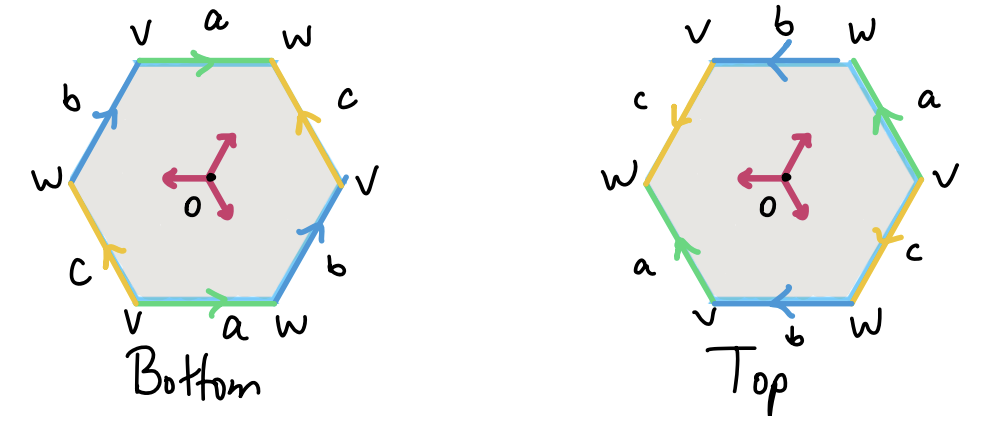

The three sides are as follows:

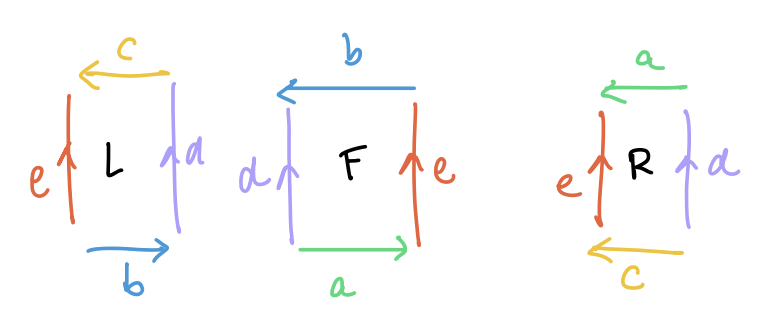

The following sage code implements the cellular chain complex for $E(2)/S333$ and computes its homology:

In [8]:
C333 = ChainComplex({
    1: matrix(ZZ,2,5,[-1,1,-1,0,0,1,-1,1,0,0]),
    2: matrix(ZZ,5,4,[0,1,1,0,0,0,1,1,0,-1,0,1,0,1,-1,1,0,-1,1,-1]),
    3: matrix(ZZ,4,1,[0,0,0,0])},
    degree_of_differential=-1)
ascii_art(C333)

                                   [ 0  1  1  0]                
                                   [ 0  0  1  1]       [0]      
                                   [ 0 -1  0  1]       [0]      
            [-1  1 -1  0  0]       [ 0  1 -1  1]       [0]      
            [ 1 -1  1  0  0]       [ 0 -1  1 -1]       [0]      
 0 <-- C_0 <----------------- C_1 <-------------- C_2 <---- C_3 <-- 0 

In [9]:
C333.homology()

{0: Z, 1: Z x C3, 2: Z, 3: Z}

As such, $H_1(E(2)/S333;\mathbb{F_3})\cong \mathbb{F}_3^2$ while $H_1(E(2)/S333;\mathbb{F}_p)\cong \mathbb{F}_p$ for $p\ne 3$.

## $S632$

We now come to the final wallpaper group, $S632$. A fundamental domain for $S632$ acting on $E(2)$ is given by a regular hexagonal prism with base in $\mathbb{R}^2\times 0$ and heigh $2\pi/6 = \pi/3$. Identifications are given by matching opposite vertical sides by translation, and by translation by $(0,\pi/3)$ with a one-sixth twist. The bottom, top, and sides look like

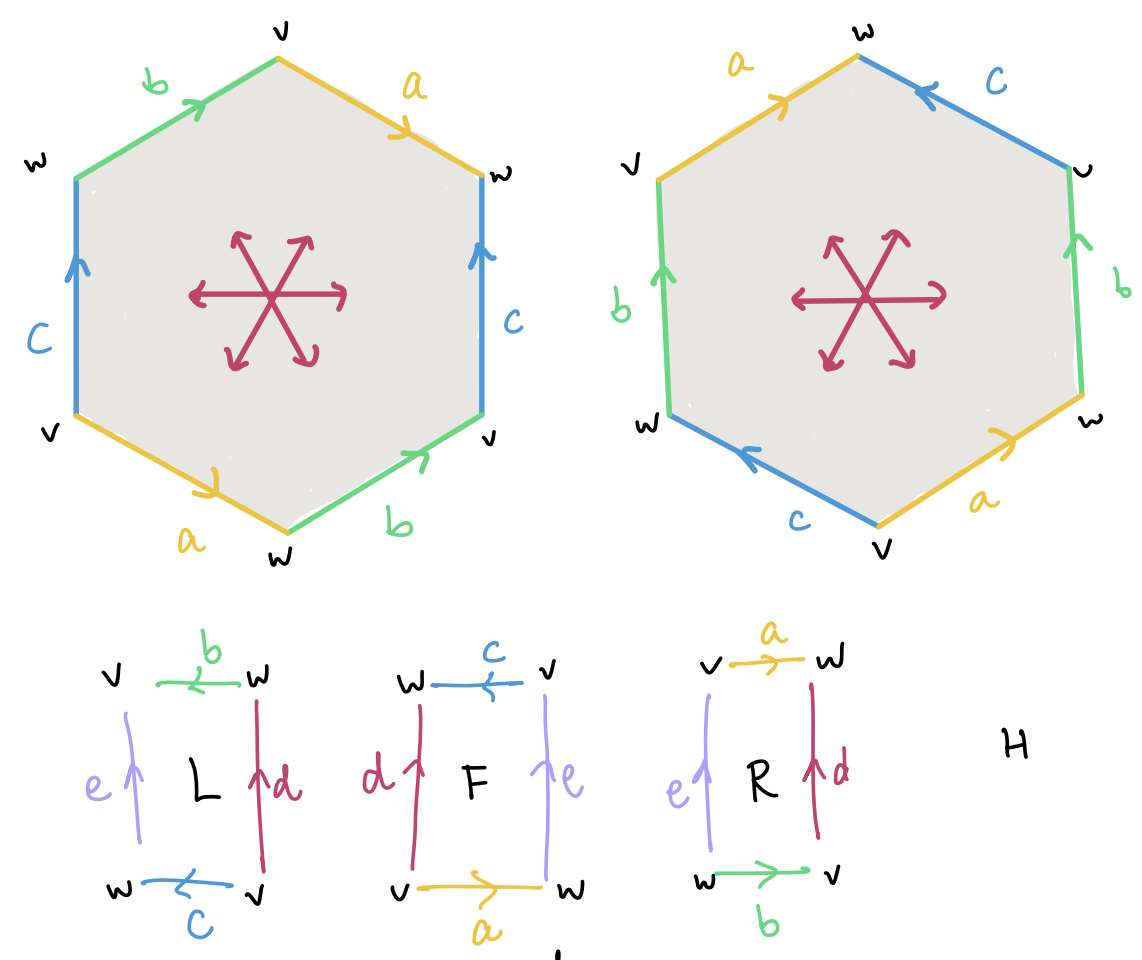

The following sage code implements the cellular chain complex for $E(2)/S632$ and computes its homology:

In [10]:
C632 = ChainComplex({
    1: matrix(ZZ,2,5,[-1,1,-1,-1,1,1,-1,1,1,-1]),
    2: matrix(ZZ,5,4,[0,1,0,-1,0,0,1,1,0,1,-1,0,0,-1,1,1,0,1,-1,-1]),
    3: matrix(ZZ,4,1,[0,0,0,0])},
    degree_of_differential=-1)
ascii_art(C632)

                                   [ 0  1  0 -1]                
                                   [ 0  0  1  1]       [0]      
                                   [ 0  1 -1  0]       [0]      
            [-1  1 -1 -1  1]       [ 0 -1  1  1]       [0]      
            [ 1 -1  1  1 -1]       [ 0  1 -1 -1]       [0]      
 0 <-- C_0 <----------------- C_1 <-------------- C_2 <---- C_3 <-- 0 

In [11]:
C632.homology()

{0: Z, 1: Z, 2: Z, 3: Z}

In particular, $H_1(E(2)/S632;\mathbb{F}_p)\cong \mathbb{F}_p$ for all $p$.

## Distinguishing wallpaper symmetry groups

The above computations imply that the dimension of $H_1(E(2)/\Gamma;\mathbb{F}_p)$ — _i.e._, the mod $p$ first Betti numbers — determine $\Gamma$. We record these numbers here for use in applications:

|        $\Gamma$       |      mod 2 $\beta_{1}$     |      mod 3 $\beta_{1}$     |
|:---------------------:|:------------------------------------------:|:------------------------------------------:|
|          $S$          |                    3                       |                    3                       |
|        $S2222$        |                    3                       |                    1                       |
|         $S333$        |                    1                       |                    2                       |
|         $S432$        |                    2                       |                    1                       |
|         $S632$        |                    1                       |                    1                       |

In the following sections, we will attempt to model the isometric configurations of an image as a high-dimensional point cloud, and then compute mod 2 and mod 3 first persistent homology in order to distinguish symmetry groups. A number of technical issues prevent the straightforward implementation of this plan, but the above table implies that it is feasible in principle.